In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load dataset

In [44]:
df = pd.read_csv("../data/interim/hr_analytics_merged.csv")

### Handle missing values

In [45]:
missing_cols = df.columns[df.isnull().any()].to_list()
print(f"Kolom dengan Missing Values: {missing_cols}")
print(df[missing_cols].isnull().sum())

Kolom dengan Missing Values: ['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64


Data numerik (NumCompaniesWorked dan TotalWorkingYears) diisi dengan nilai median tiap kolom untuk menghindari nilai outlier

In [46]:
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].median())
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].median())

In [47]:
survey_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
for col in survey_cols:
    df[col] = df[col].fillna(df[col].median())

print("\nStatus setelah imputasi (sisa missing values):")
print(df.isnull().sum().sum())


Status setelah imputasi (sisa missing values):
0


In [48]:
duplicates = df.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicates}")


Jumlah data duplikat: 0


### Outliers

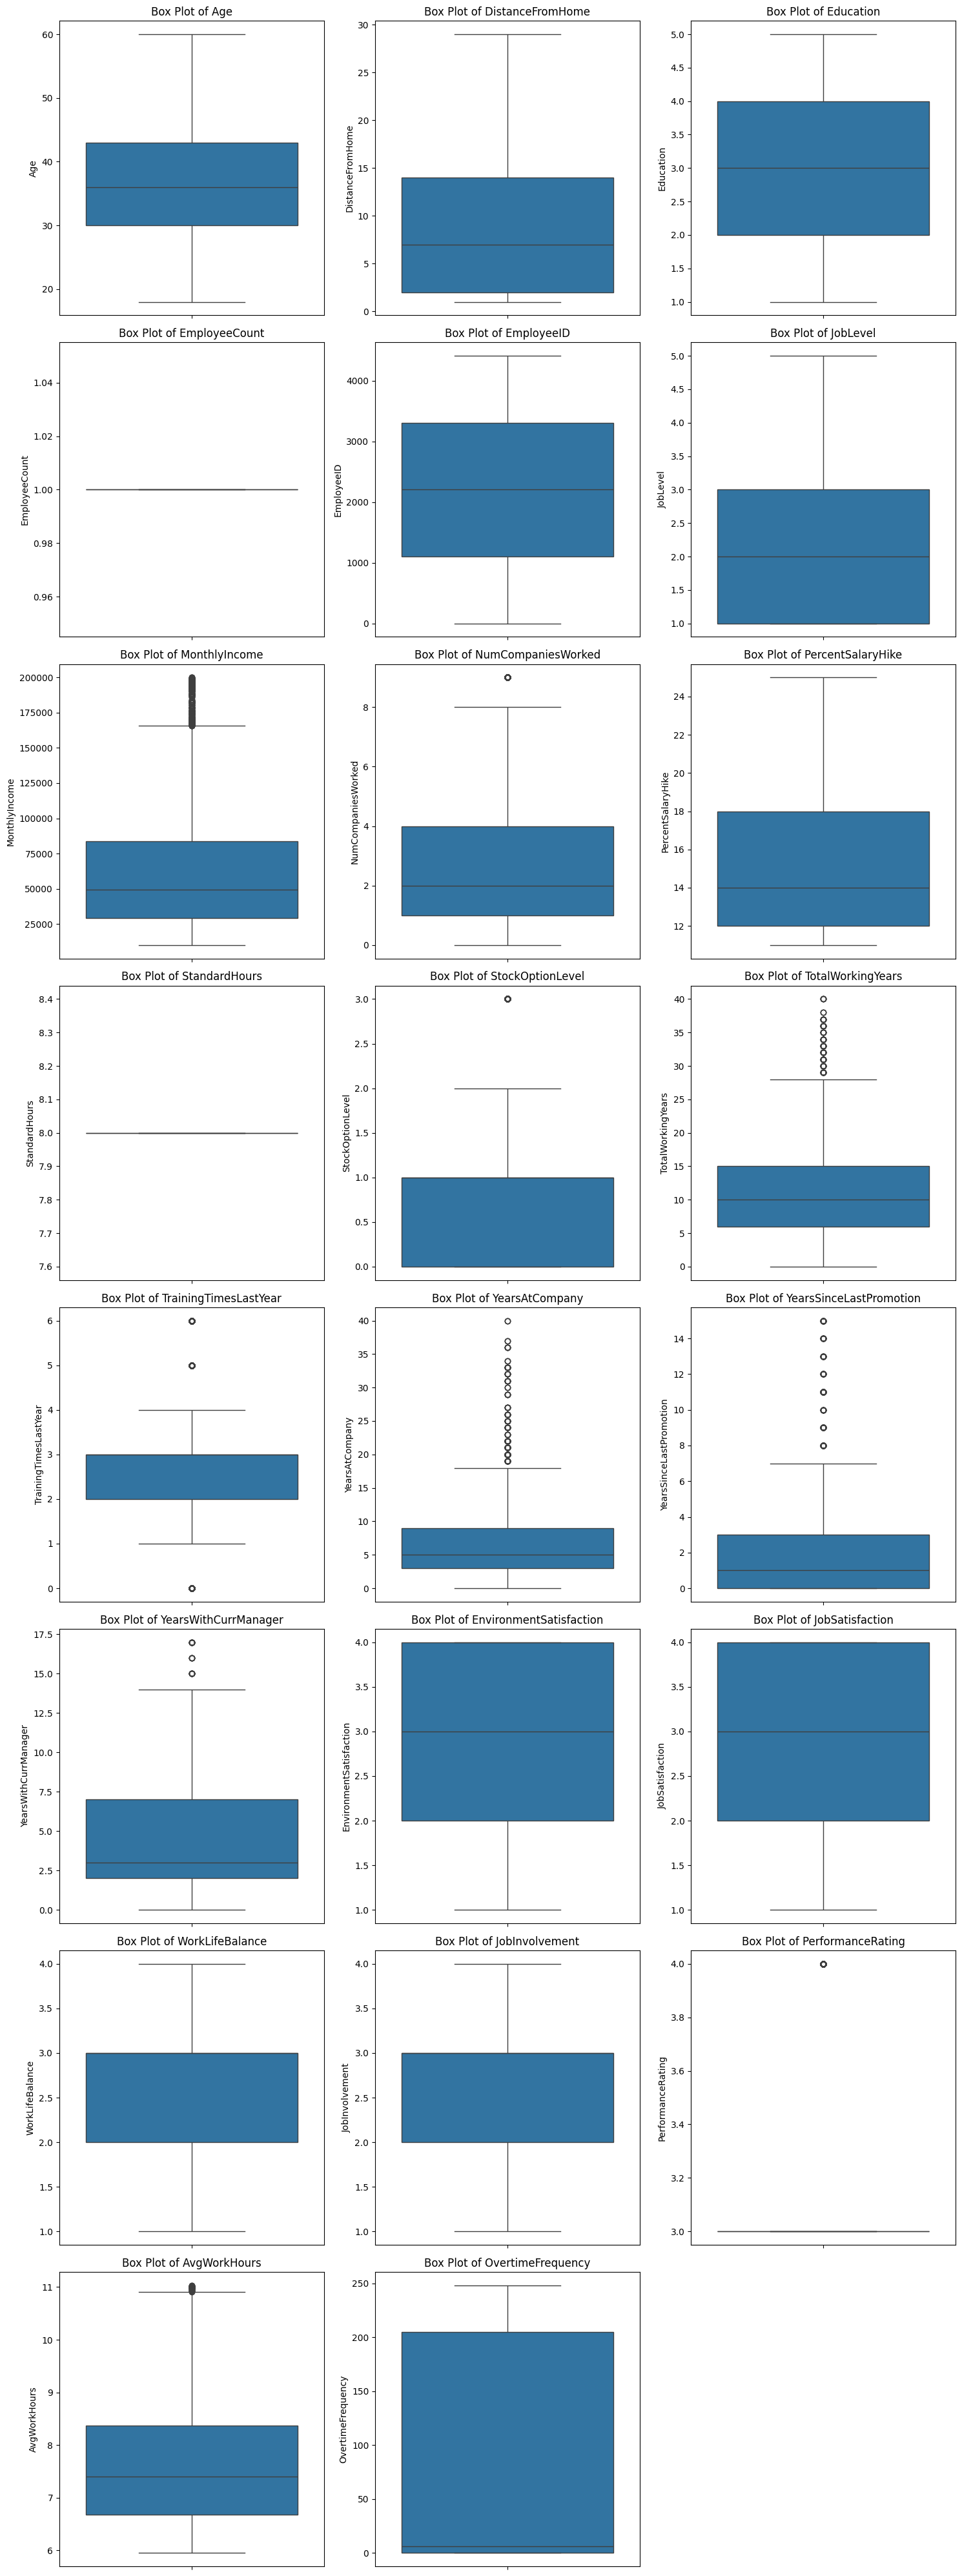

In [49]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_plots = len(numerical_cols)

cols = 3
rows = math.ceil(num_plots/cols)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()

===== Nilai Korelasi dengan Attrition (Urut dari Positif ke Negatif) =====
OvertimeFrequency          0.233609
AvgWorkHours               0.201688
NumCompaniesWorked         0.042064
PercentSalaryHike          0.032533
PerformanceRating          0.023403
StockOptionLevel          -0.006839
DistanceFromHome          -0.009730
JobLevel                  -0.010290
Education                 -0.015111
JobInvolvement            -0.015588
MonthlyIncome             -0.031176
YearsSinceLastPromotion   -0.033019
TrainingTimesLastYear     -0.049431
WorkLifeBalance           -0.062975
EnvironmentSatisfaction   -0.101625
JobSatisfaction           -0.103068
YearsAtCompany            -0.134392
YearsWithCurrManager      -0.156199
Age                       -0.159205
TotalWorkingYears         -0.170162
Name: Attrition_Numeric, dtype: float64


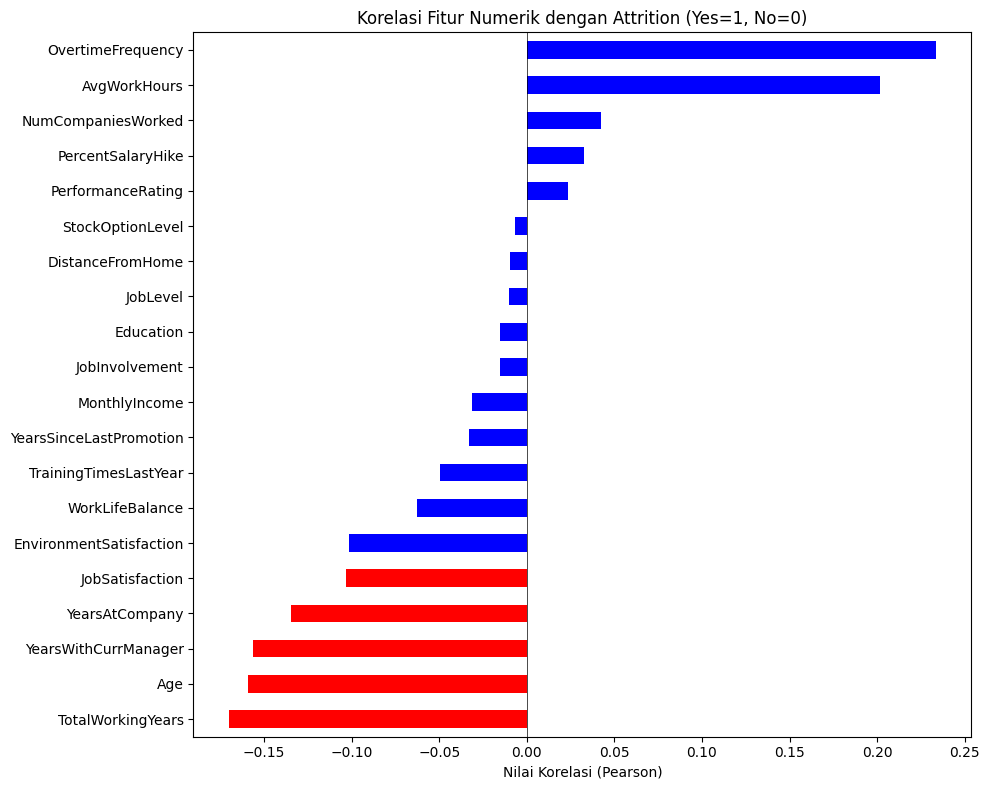

In [50]:
df['Attrition_Numeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()['Attrition_Numeric'].sort_values(ascending=False)

if 'Attrition_Numeric' in correlations:
    correlations = correlations.drop('Attrition_Numeric')
if 'EmployeeID' in correlations:
    correlations = correlations.drop('EmployeeID')
if 'StandardHours' in correlations: # StandardHours biasanya konstan 8, korelasi NaN atau 0
    correlations = correlations.drop('StandardHours')
if 'EmployeeCount' in correlations: # Biasanya konstan 1
    correlations = correlations.drop('EmployeeCount')

print("===== Nilai Korelasi dengan Attrition (Urut dari Positif ke Negatif) =====")
print(correlations)

plt.figure(figsize=(10, 8))
colors = ['red' if x > 0 else 'blue' for x in correlations]
correlations.sort_values().plot(kind='barh', color=colors)
plt.title('Korelasi Fitur Numerik dengan Attrition (Yes=1, No=0)')
plt.xlabel('Nilai Korelasi (Pearson)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()

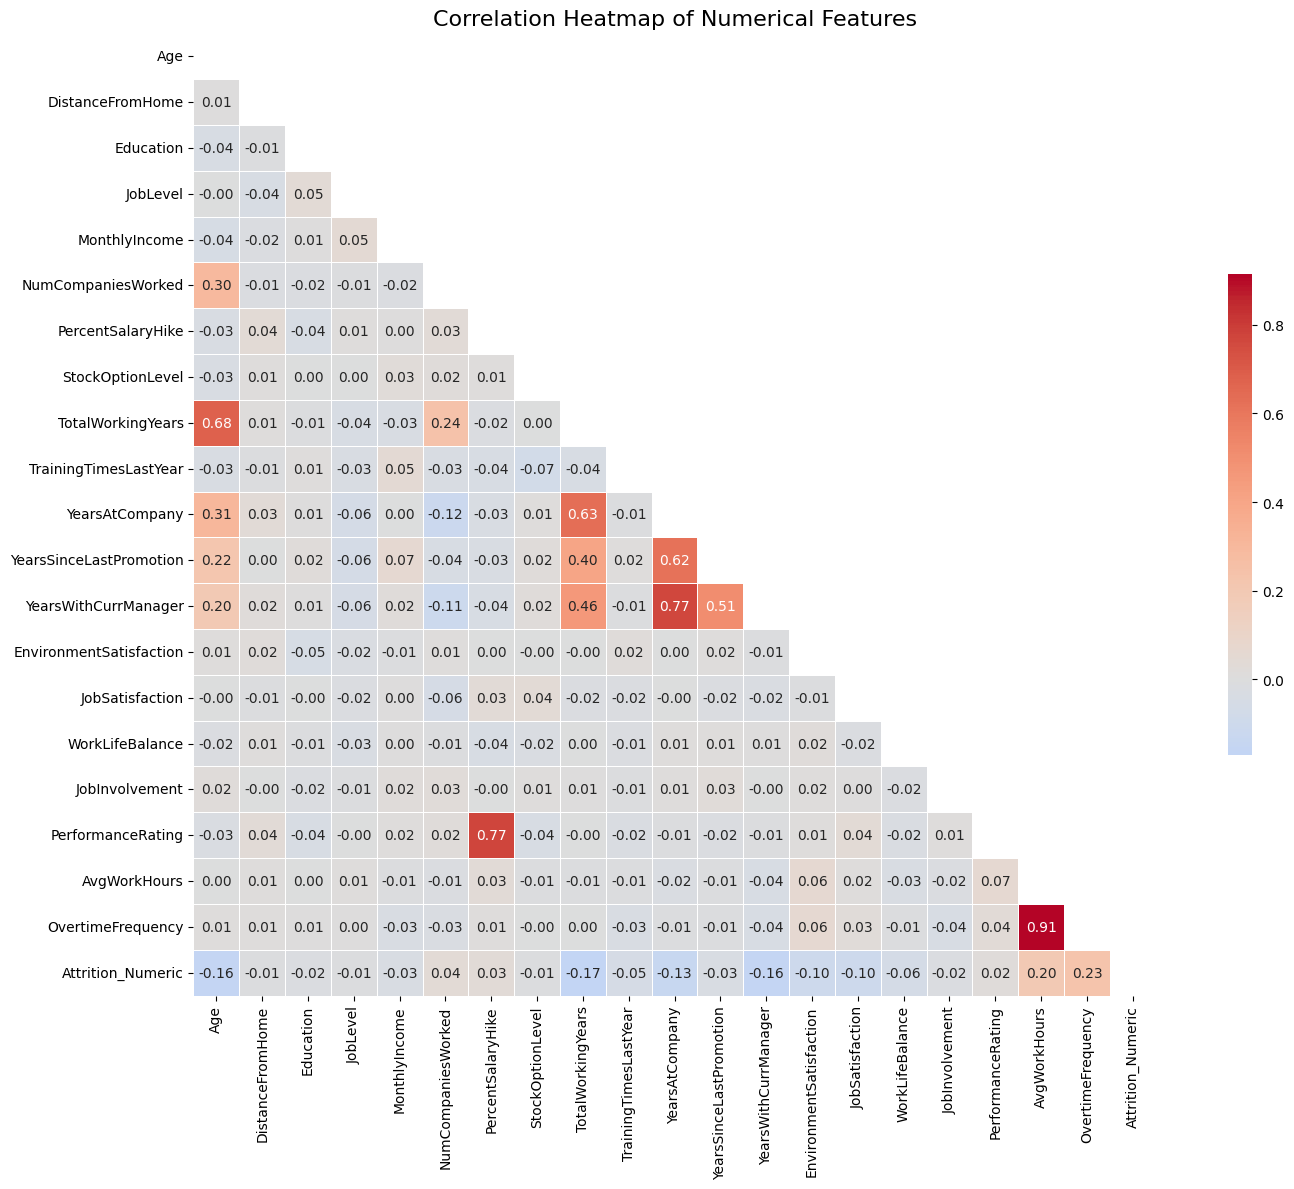

In [51]:
cols_to_drop = ['EmployeeID', 'EmployeeCount', 'StandardHours']
numeric_df = numeric_df.drop(columns=[c for c in cols_to_drop if c in numeric_df.columns])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix, 
    mask=mask,
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    center=0,
    square=True, 
    linewidths=.5,
    cbar_kws={"shrink": .5}
)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()

In [ ]:
df.to_csv('../data/interim/hr_analytics_clarified.csv', index=False)
print("Data berhasil disimpan ke ../data/interim/hr_analytics_clarified.csv")